In [4]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
#Load the dataset
df = pd.read_csv('train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


# **Data Understanding**

In [6]:
df.shape

(550068, 12)

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


# **Data Visualization**

<ipython-input-10-f832f10edb27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Gender", palette="mako")


<Axes: xlabel='Gender', ylabel='count'>

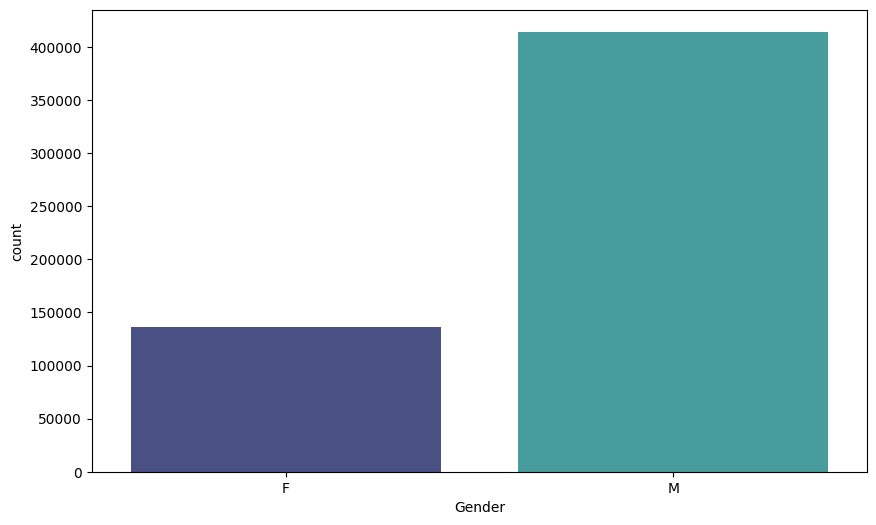

In [10]:
#This shows that the male count is higher as compared to females
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Gender", palette="mako")

<Axes: xlabel='Gender', ylabel='Marital_Status'>

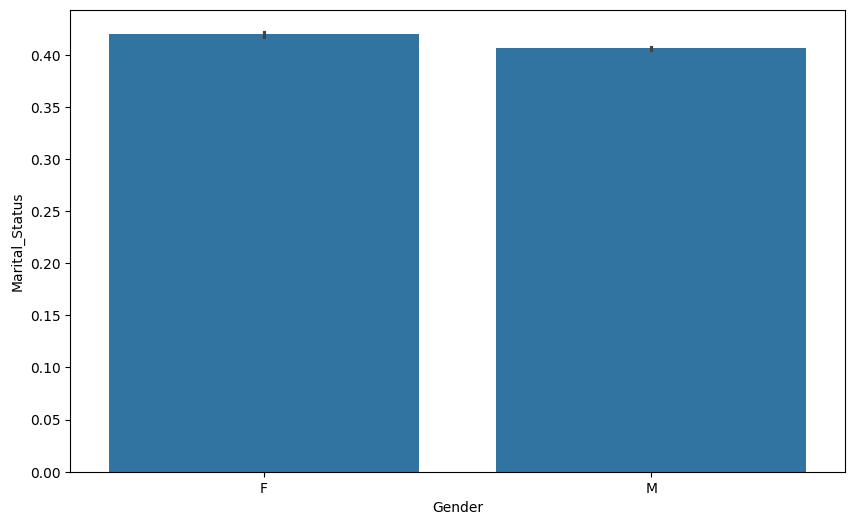

In [11]:
#This shows that married females are slightly higher as compared to married males
plt.figure(figsize=(10,6))
sns.barplot(x="Gender", y="Marital_Status",data=df)

<Axes: xlabel='Gender', ylabel='Purchase'>

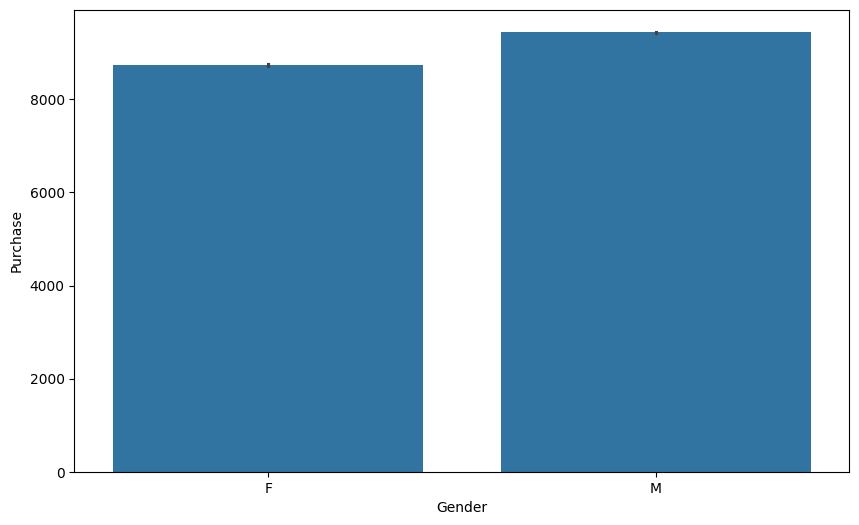

In [12]:
#This shows higher purchases were made by males as compared to females
plt.figure(figsize=(10,6))
sns.barplot(x="Gender", y="Purchase",data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

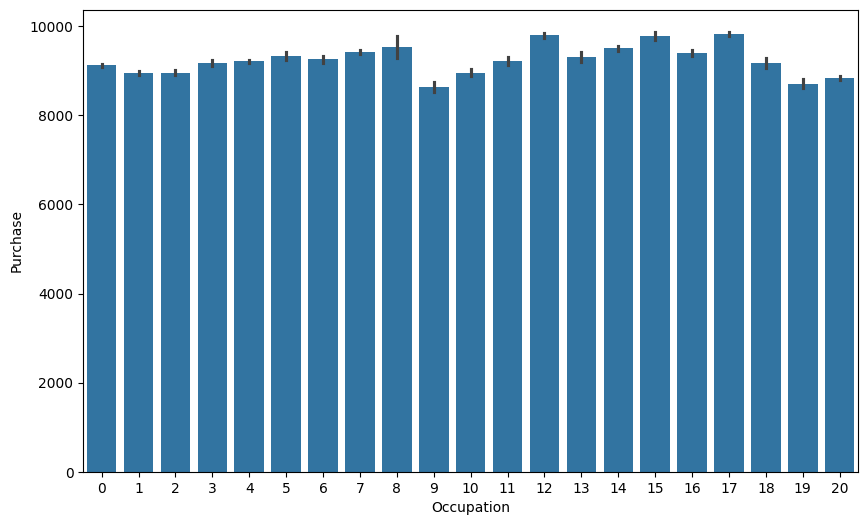

In [13]:
#This shows that occupation has a direct effect on purchases
plt.figure(figsize=(10,6))
sns.barplot(x="Occupation", y="Purchase",data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

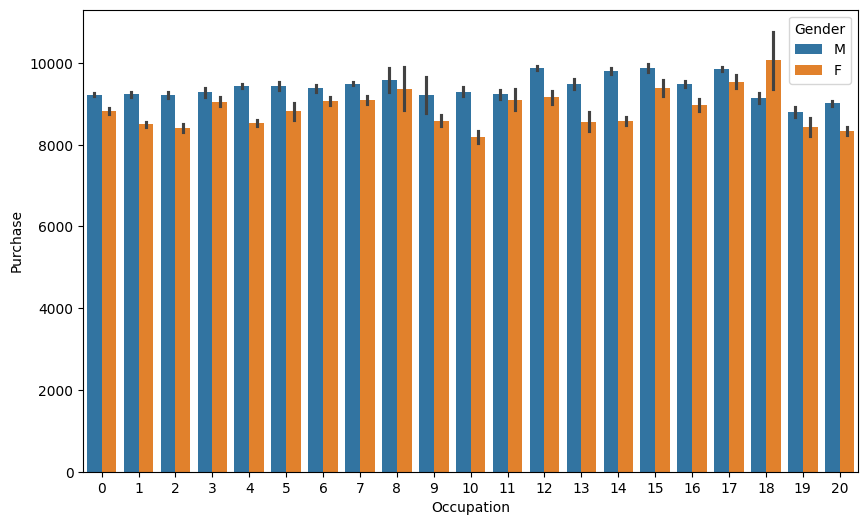

In [14]:
#This shows that males in the occupation have higher purchases
plt.figure(figsize=(10,6))
sns.barplot(x="Occupation", y="Purchase",hue="Gender",data=df)

# **Outlier Detection**

<Axes: xlabel='Gender', ylabel='Purchase'>

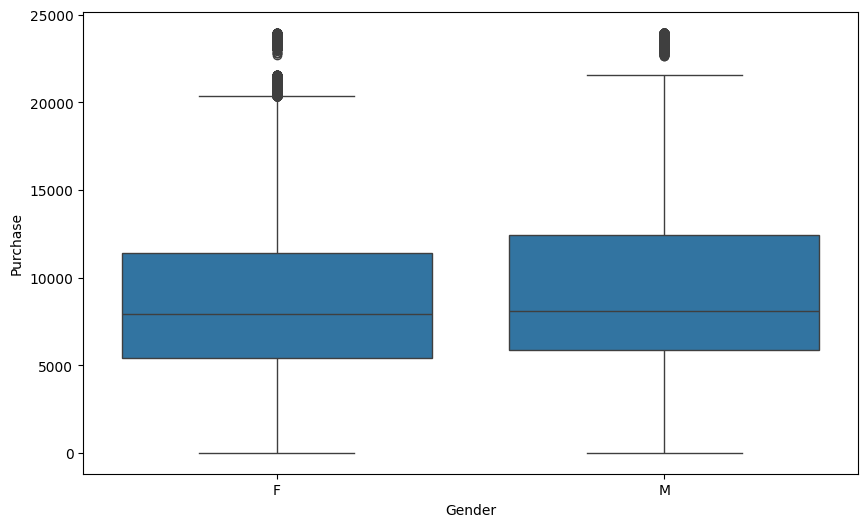

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Gender", y="Purchase")
#This plot detects the outliers

<Axes: xlabel='Occupation', ylabel='Purchase'>

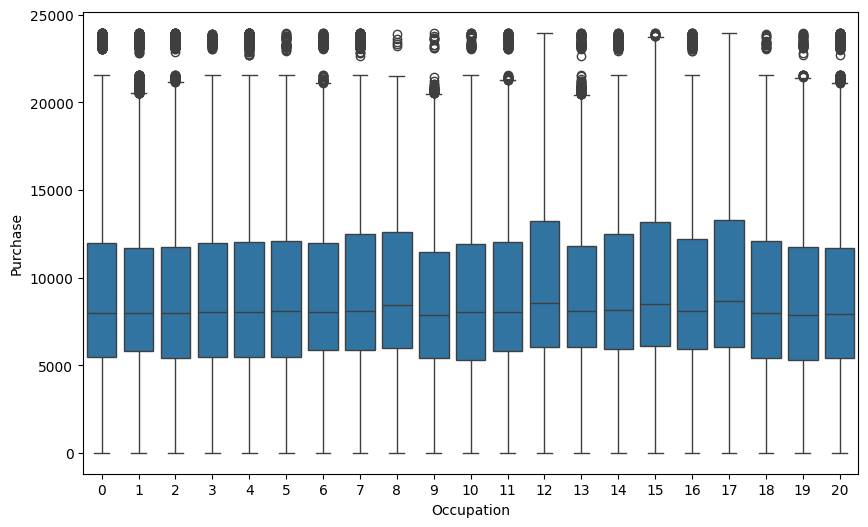

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Occupation", y="Purchase",data=df)
#This shows outliers in Purchase column w.rt. Occupation

<Axes: xlabel='Age', ylabel='Purchase'>

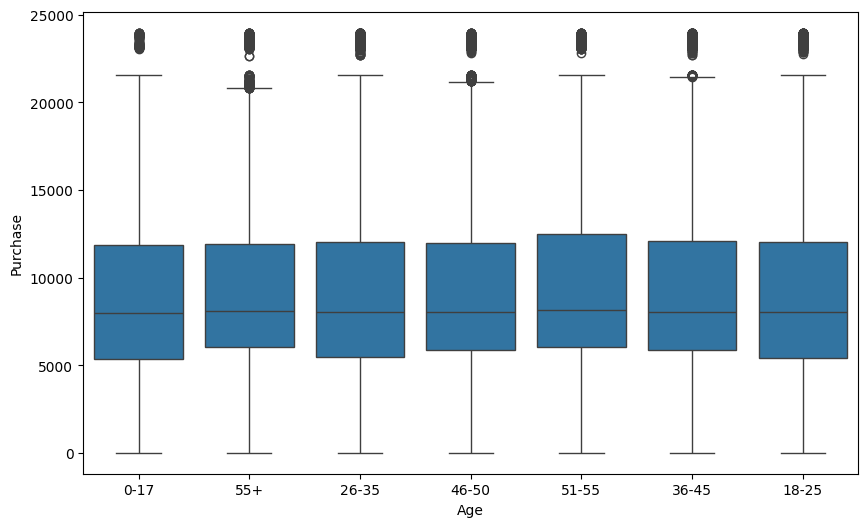

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Age", y="Purchase",data=df)
#This shows outliers in Purchase column w.rt. Age

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

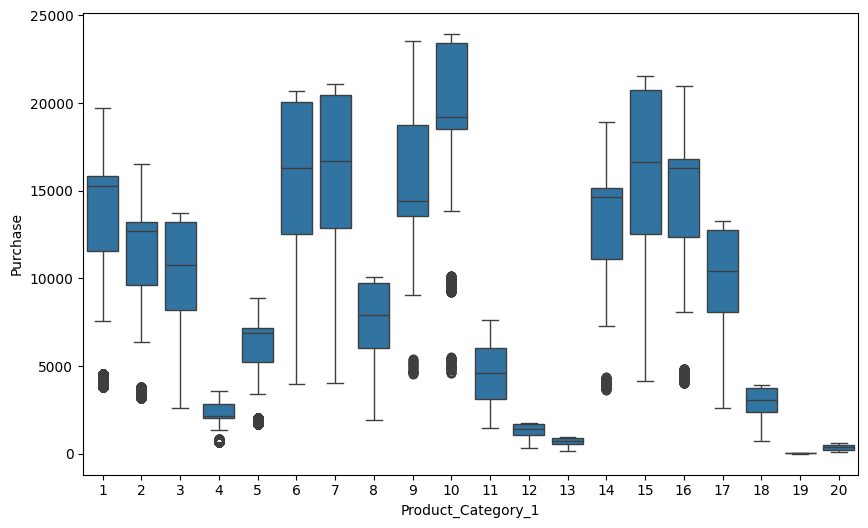

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Product_Category_1", y="Purchase",data=df)
#This shows outliers in Product Category column w.rt. Purchase

# **Data Preprocessing**

In [19]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [20]:
df['Product_ID']=df['Product_ID'].str.replace('P00','')
ss = StandardScaler()
df['Product_ID']=ss.fit_transform(df['Product_ID'].values.reshape(-1,1))

In [21]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

In [22]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [23]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [24]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


# **Label Encoding**

In [25]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
  df[i]=le.fit_transform(df[i])
df.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
City_Category,int64
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [26]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [27]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [28]:
df['City_Category']=df['City_Category'].astype('category')

In [29]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


# **Distribution Plot**

<ipython-input-30-ca3fc81a3bfd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-30-ca3fc81a3bfd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-30-ca3fc81a3bfd>:8: UserWarning: 

`distplot` is a deprecated f

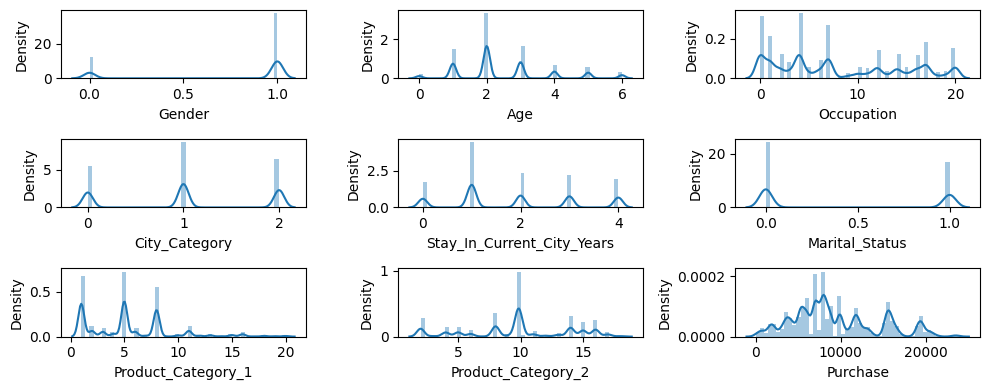

In [30]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]],ax=ax[i][j])
    index=index+1
plt.tight_layout()

# **Log Transformation**

In [31]:
df['Purchase']=np.log(df['Purchase'])

In [32]:
df=pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True


# **Train Test Split**

In [33]:
X=df.drop(labels=['Purchase'],axis=1)
y=df['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,False,False,True


In [34]:
y

,Purchase
0,9.032409
1,9.629051
2,7.259820
3,6.963190
4,8.983314
...,...
550063,5.908083
550064,5.916202
550065,4.919981
550066,5.899897


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(440054, 12) (110014, 12) (440054,) (110014,)


In [36]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
Y_predict=model.predict(X_test)

In [39]:
score=r2_score(y_test,Y_predict)
mse=mean_squared_error(y_test,Y_predict)
mae=mean_absolute_error(y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(y_test,Y_predict)))
print('R2 Score:',score)
print('MSE:',mse)
print('MAE:',mae)
print('RMSE: ',rmse)

R2 Score: 0.19736585135338747
MSE: 0.4379086718888517
MAE: 0.4532932460017191
RMSE:  0.6617466825673187


# **Decision Tree Regressor**

In [40]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [41]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [42]:
RMSE_train=(np.sqrt(mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_preds)))
print('RMSE_train:',str(RMSE_train))
print('RMSE_test:',str(RMSE_test))
print('-'*50)
print('Rsquared value on train:',DT.score(X_train,y_train))
print('Rsquared value on test:',DT.score(X_test,y_test))

RMSE_train: 0.3675660719315571
RMSE_test: 0.3708489591635455
--------------------------------------------------
Rsquared value on train: 0.7537514688784452
Rsquared value on test: 0.747925905114232


# **Random Forest Regressor**

In [43]:
RF=RandomForestRegressor().fit(X_train,y_train)

In [44]:
train_preds=RF.predict(X_train)
test_preds=RF.predict(X_test)

In [45]:
RMSE_train=(np.sqrt(mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_preds)))
print('RMSE_train:',str(RMSE_train))
print('RMSE_test:',str(RMSE_test))
print('-'*50)
print('Rsquared value on train:',RF.score(X_train,y_train))
print('Rsquared value on test:',RF.score(X_test,y_test))

RMSE_train: 0.13122996444492316
RMSE_test: 0.3531385284190002
--------------------------------------------------
Rsquared value on train: 0.9686116247040314
Rsquared value on test: 0.7714273342128508


In [46]:
df_test=pd.read_csv('test.csv')
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [47]:
df_test.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,72344


In [48]:
df_test['Product_ID']=df_test['Product_ID'].str.replace('P00','')
ss=StandardScaler()
df_test['Product_ID']=ss.fit_transform(df_test['Product_ID'].values.reshape(-1,1))

In [49]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)

In [50]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [51]:
df_test.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [52]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


# **Label Encoding Categorical Data**

In [53]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
  df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
City_Category,int64
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [54]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')

In [55]:
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')

In [56]:
df_test=pd.get_dummies(df_test)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.0,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.0,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.0,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.0,False,False,True


In [57]:
df_test.shape

(233599, 12)

In [63]:
test_preds=RF.predict(df_test)
len(test_preds)
test_preds

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([9.44204425, 9.35710914, 4.46624726, ..., 9.60953669, 4.57354934,
       4.31848633])

In [59]:
id_frame=pd.read_csv('test.csv')

In [60]:
ID_info=id_frame[['User_ID','Product_ID']]
ID_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [61]:
predictions=pd.DataFrame(test_preds,columns=['Purchase'])
predictions['User_ID']=ID_info['User_ID']
predictions['Product_ID']=ID_info['Product_ID']
predictions.head()

,Purchase,User_ID,Product_ID
0,9.442044,1000004,P00128942
1,9.357109,1000009,P00113442
2,4.466247,1000010,P00288442
3,4.466247,1000010,P00145342
4,4.641656,1000011,P00053842


In [62]:
predictions.to_csv('BlackFridayPredictions.csv',index=False)